[**Source**](https://www.analyticsvidhya.com/blog/2022/02/implementing-logistic-regression-from-scratch-using-python/? )

In [1]:
import numpy as np 
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt

### Standardization
Standardization is the process of adjusting data so that it has a mean of zero and a standard deviation of one. This is done to ensure that different features of a dataset are on the same scale and to prevent certain algorithms, such as gradient descent, from being affected by the scale of the data. For example, if a dataset has two features, age and salary, standardizing the data will prevent the salary feature from dominating the outcome due to its larger range. It is generally recommended to standardize data before using it in an algorithm.

Mathematically it is given as  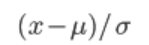

In [2]:
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

### Initializing Parameters

When working with data sets, we typically use matrices to perform calculations. In this case, there are two matrices to consider: one for feature vectors and one for parameters or weights. The matrix for feature vectors has a dimension of mxn, where m is the number of observations and n is the number of features. The second matrix, for parameters or weights, has a dimension of nx1. To make the model more flexible, we add a bias column of ones to the feature vectors matrix and a corresponding parameter term to the weight vector. This allows the model to have more flexibility when making predictions.

In [3]:
def initialize(self,X):
    weights = np.zeros((shape(X)[1]+1,1))
    X = np.c_[np.ones((shape(X)[0],1)),X]
    return weights,X

### Sigmoid Function

In a linear regression model, the hypothesis function is a linear combination of parameters represented by y = ax + b for a single parameter data. This function is effective for predicting continuous values. However, in logistic regression, the response variables are binary, such as "yes" or "no". Therefore, it is not appropriate to use the linear function to predict anything other than values between 0 and 1. To achieve this, the sigmoid or logistic function is often used as it limits the results of a linear equation to the range of [0,1].

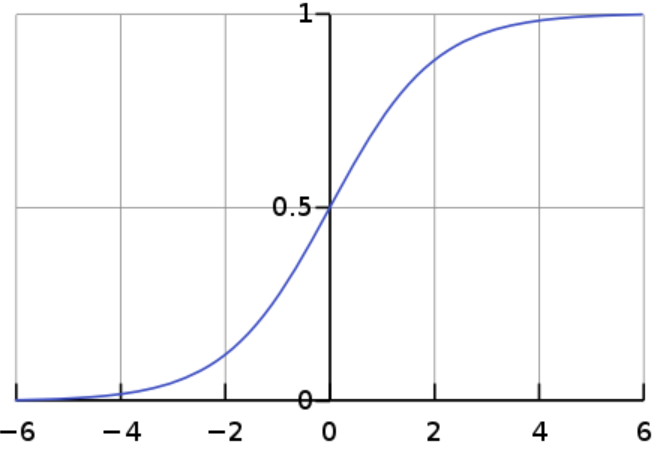

The sigmoid function intersects the y-axis at 0.5, which is often used as a threshold for classification in logistic regression. Values above the threshold are classified as 1, while values below it are classified as 0. However, it is worth noting that this is not a hard and fast rule and different threshold values can be used depending on the requirements of the specific application.
The sigmoid function is:

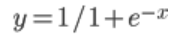

We plug the linear equation in place of x.

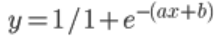

python code:

In [4]:
def sigmoid(self,z):
    sig = 1/(1+e**(-z))
    return sig

### Cost function
The formula gives the cost function for the logistic regression.

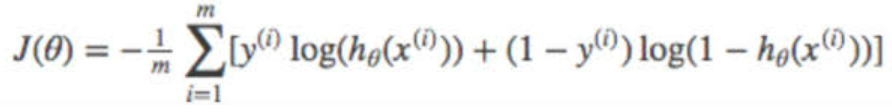

Where hx = is the sigmoid function we used earlier.

python code:

In [5]:
def cost(theta):
    z = dot(X,theta)
    cost0 = y.T.dot(log(self.sigmoid(z)))
    cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
    cost = -((cost1 + cost0))/len(y) 
    return cost

### Gradient Descent

Gradient descent is an optimization algorithm that finds the best-fitting parameters for a model. Gradients, which are the vector of the first-order derivative of the cost function, are used to determine the direction of the steepest ascent or maximum of a function. In gradient descent, we move in the opposite direction of the gradients and update the weights until convergence is achieved. The gradient descent formula is derived by differentiating the cost function.

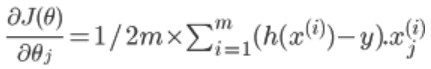

or,

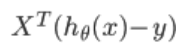

This is the vectorised form of the gradient descent expression, which we will be using in our code.

In [6]:
def fit(self,X,y,alpha=0.001,iter=100):
    params,X = self.initialize(X)
    cost_list = np.zeros(iter,)
    for i in range(iter):
        params = params - alpha * dot(X.T, self.sigmoid(dot(X,params)) - np.reshape(y,(len(y),1)))
        cost_list[i] = cost(params)
    self.params = params
    return cost_list

### Prediction
Everything that we have done far is for this step. We trained the model on a training dataset, and now We will use the learned parameters to predict the unseen data.

In [7]:
def predict(self,X):
    z = dot(self.initialize(X)[1],self.weights)
    lis = []
    for i in self.sigmoid(z):
        if i>0.5:
            lis.append(1)
        else:
            lis.append(0)
    return lis

### F1-Score
Now that we are done with the prediction, we will move on to the F1-score section, where we will measure how good our model predicts for unseen data. The F1_score is a robust metric for evaluating the performances of classification models, and mathematically F1-score is the harmonic mean of precision and recall.

precision = Precision is the number of true positives over the sum of true positives and false positives
precision = TP/(TP+FP)

recall = Recall is the number of true positives over the sum of true positives and false negatives.
recall = TP/(TP+FN)

f1-score = 2*precision\*recall/(precision+recall)

In [8]:
def f1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

### Putting it all together

In [9]:
import numpy as np 
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  

# X,y = make_classification(n_features=4)
X,y = make_classification(n_samples=100,
                                      n_features=10,
                                      n_informative=10,
                                      n_redundant=0,
                                      n_classes=2,
                                      weights=[0.3, 0.7],
                                      random_state=42)

X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0

    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    
    return f1_score

class LogidticRegression:

    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    
    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        
        cost_list = np.zeros(iter,)
        
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
    
        lis = []
    
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

standardize(X_tr)

standardize(X_te)

obj1 = LogidticRegression()
model= obj1.fit(X_tr,y_tr)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)

#Let's see the f1-score for training and testing data
f1_score_tr = F1_score(y_tr,y_train)
f1_score_te = F1_score(y_te,y_pred)

print(f1_score_tr)
print(f1_score_te)

0.9268292682926829
0.7499999999999999


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

model = LogisticRegression().fit(X_tr,y_tr)

y_pred = model.predict(X_te)

print(f1_score(y_te,y_pred))
print(accuracy_score(y_te,y_pred))

0.8235294117647058
0.7
